## Exploratory Data Analysis ##

Here I am exploring a sample from the 1990 census of the US population, which is available [here](https://archive.ics.uci.edu/ml/datasets/Adult). It is a dataset containing a series of demographic variables for each instance and whether they make more than $50k a year.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adult_data = pd.read_csv('data/adult.data', header=None)
adult_data.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

# It seems some values have a space before, which can be annoying.
adult_data.replace({' Male':'Male', ' Female':'Female'}, inplace=True)

adult_data.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# For simplicity let us change the income column for an indicator of whether the person makes more than 
# 50 k or not, and we will call it high income.
adult_data = pd.get_dummies(adult_data, columns=['income'], drop_first=True)
adult_data = adult_data.rename({'income_ >50K':'high_income'}, axis='columns')

adult_data.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
# Make a sort of demographics table
print('>50k portion is the percentage in that group with a high income.')
print()

pd.set_option('precision', 2)

columns = ['race', 'sex','education']
num_rows = len(adult_data)
total_high_income = adult_data.high_income.sum()
tables = {}

for col in columns:
    print(col)
    demographics_table = pd.DataFrame(columns=['count','percentage','>50k',
                                               '>50k percentage','>50k portion'])
    gb = adult_data.groupby(col)['high_income'].aggregate(['count','sum'])
    gb['percentage'] = gb['count']*100/num_rows
    gb['>50k percentage'] = gb['sum']*100/total_high_income
    gb['>50k portion'] = gb['sum']*100/gb['count']
    gb.rename({'sum':'>50k'}, inplace=True, axis=1)
    demographics_table = demographics_table.append(gb)
    print(demographics_table,'\n')
    tables[col] = demographics_table

>50k portion is the percentage in that group with a high income.

race
                     count  percentage    >50k  >50k percentage  >50k portion
 Amer-Indian-Eskimo    311        0.96    36.0             0.46         11.58
 Asian-Pac-Islander   1039        3.19   276.0             3.52         26.56
 Black                3124        9.59   387.0             4.94         12.39
 Other                 271        0.83    25.0             0.32          9.23
 White               27816       85.43  7117.0            90.77         25.59 

sex
        count  percentage    >50k  >50k percentage  >50k portion
Female  10771       33.08  1179.0            15.04         10.95
Male    21790       66.92  6662.0            84.96         30.57 

education
               count  percentage    >50k  >50k percentage  >50k portion
 10th            933        2.87    62.0             0.79          6.65
 11th           1175        3.61    60.0             0.77          5.11
 12th            433        1.33

From the tables above we can take away a few points straight away:

 1. White and Pacific Islander people are more than two times more likely to earn a high income than people from other ethnic backgrounds (the largest group of which is Black people).
 
 1. Male workers are almost three times as likely to have a high income as female worker. Moreover, they make up about 2 thirds of the work force in our sample.
 
 1. Having a degree greatly increases your chances of having a high income, and the more education you have the higher the chances, with almost three quarters of people with a phd making a high income.
 
We can see this visually:

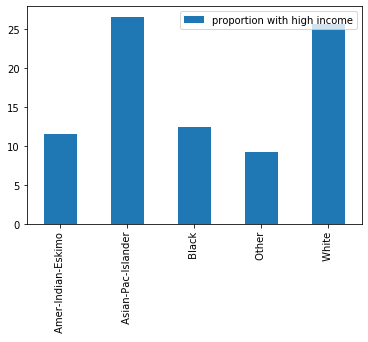

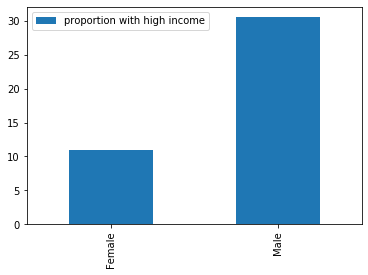

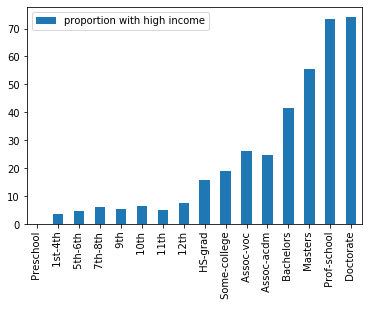

In [6]:
# First get the education levels in order, so the plot is more intuitive:
unzip = lambda array, index: [a[index] for a in array]
education_levels = list(zip(adult_data.education.unique(), adult_data.education_num.unique()))
education_levels = sorted(education_levels, key=lambda x: x[1])
education_levels = unzip(education_levels, 0)

for col in columns[:2]:
    tables[col].plot.bar(y='>50k portion', label='proportion with high income')
    plt.show()
    
tables['education'].loc[education_levels].plot.bar(y='>50k portion', label='proportion with high income')
plt.show()

It seems that demographics has a very big effect on your chances of having a high income. Let us continue to explore the relationship between other variables and whether someone has a high income or not. Remember that this is only data for people who are working. Lets start with age, a priori we can say that people at the start of their careers are unlikely to have a high income.

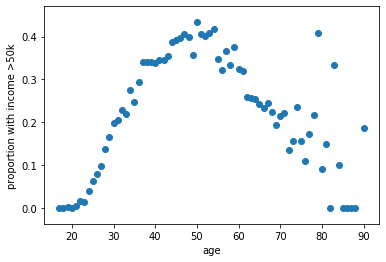

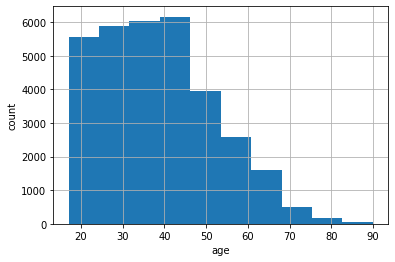

In [7]:
gb = adult_data.groupby('age')['high_income'].aggregate(['sum', 'count'])
gb['proportion'] = gb['sum']/gb['count']
plt.scatter(gb.index, gb['proportion'])
plt.xlabel('age')
plt.ylabel('proportion with income >50k')
plt.show()

adult_data['age'].hist()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

The proportion of people with a high income increases between with age until the age of 50 approximately. From this age on the proportion starts to decline. The initial trend is what would be expected, you don't start with a high income job, but you get there with time. On the later downward trend, we can only speculate, but a reasonable explaination is that people with high income start to retire around this age, whilst people with lower incomes usually can't afford to. This is backed by a reduction in the working population in the working population of this age and older. Therefore, people with high income tend to retire at a younger age (or equivalently, retire at higher rates) leaving a larger proportion of older workers which have a low income.



Let us look more closely at the differences between male and female, in terms of their likelihood of making a high income (which is 3 times higher for male as we saw earlier). In particular we would like to see how this is affected by age and level of education.

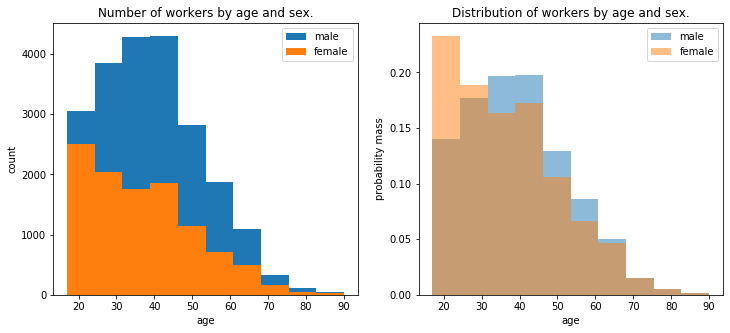

In [8]:
# distribution of age by sex
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax = axes[0]
_, bins, _ = ax.hist(adult_data.loc[adult_data.sex == 'Male','age'], label='male')
ax.hist(adult_data.loc[adult_data.sex == 'Female','age'], label='female')
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Number of workers by age and sex.')
ax.legend()

ax = axes[1]
df = adult_data.loc[adult_data.sex == 'Male','age']
weights = np.repeat(1/len(df), len(df))
ax.hist(df, label='male',weights = weights, alpha=0.5)
df = adult_data.loc[adult_data.sex == 'Female','age']
weights = np.repeat(1/len(df), len(df))
ax.hist(df, label='female',weights = weights, alpha=0.5)
ax.set_xlabel('age')
ax.set_ylabel('probability mass')
ax.set_title('Distribution of workers by age and sex.')
ax.legend()

plt.show()


Right off the bat, we can see that the number of female workers is overall much smaller and that the distributions are significantly different. This is due to a series of societal reason. Furthermore, the distribution implies that some of the difference in rate of female workers with high income is due to the fact that a larger proportion of female workers are of a younger age. 

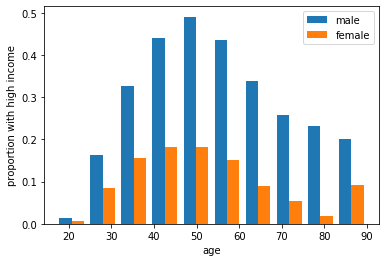

The median rate of likelihoods of having a high income between men and women for these groups is 2.559681779175878


In [9]:
width = (bins[1]-bins[0])*0.4

def index_(age):
    for i in range(len(bins)-1):
        if age < bins[i+1]:
            return i
    return len(bins)-2
proportion = lambda df: df['sum']/df['count']
age_index = [(x+y)/2 for x,y in zip(bins[:-1],bins[1:])]

male = adult_data.loc[adult_data.sex == 'Male'].set_index('age').groupby(index_)\
                    ['high_income'].aggregate(['sum','count'])
male['proportion'] = proportion(male)
female = adult_data.loc[adult_data.sex == 'Female'].set_index('age').groupby(index_)\
                    ['high_income'].aggregate(['sum','count'])
female['proportion'] = proportion(female)

plt.bar(age_index - width/2, male['proportion'], width, label='male')
plt.bar(age_index + width/2, female['proportion'], width, label='female')
plt.legend()
plt.xlabel('age')
plt.ylabel('proportion with high income')
plt.show()

print('The median rate of likelihoods of having a high income between men and women for these groups is {}'\
      .format(np.median(male['proportion']/female['proportion'])))

This last plot shows us that even when we account for age, female workers in this dataset are far less likely to make a high income than men

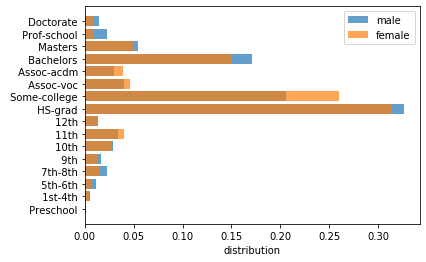

In [10]:
# Level of education by sex
edu_nums = adult_data.education_num.unique()
edu_levels = adult_data.education.unique()

male = adult_data.loc[adult_data.sex == 'Male'].groupby('education_num')['age'].aggregate(['count'])
female = adult_data.loc[adult_data.sex == 'Female'].groupby('education_num')['age'].aggregate(['count'])

plt.barh(male.index, male['count'].div(male['count'].sum()), label='male', alpha = 0.7)
plt.barh(female.index, female['count'].div(female['count'].sum()), label='female', alpha = 0.7)
plt.legend()
plt.yticks(edu_nums, edu_levels)
plt.xlabel('distribution')
plt.show()

Despite some differences, the overall distribution of education level is similar for both sexes, with the most stark differences for some-college -with women noticeably more likely to have this level of education- Doctorate and Prof-school -the later two with men much more likely to achieve it.

Finally, let us look at the rest of the variables and see if there is any relationship between them and having a high income

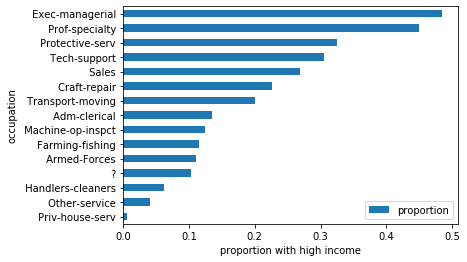

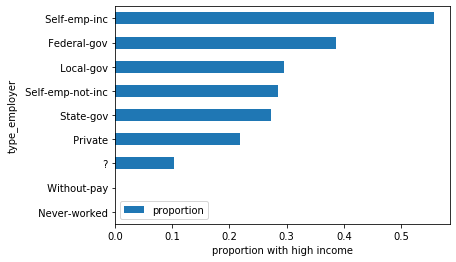

In [11]:
for col in ['occupation','type_employer']:
    df = adult_data.groupby(col)['high_income'].aggregate(['sum','count'])
    df['proportion'] = proportion(df)
    df.sort_values(by=['proportion']).plot.barh(y='proportion')
    plt.xlabel('proportion with high income')

In [12]:
proportion = lambda df: df['sum']/df['count']